 ## Projeto: Detecção de Fraudes em Cartões de Crédito

# Introdução:

A crescente popularidade do uso de cartões de crédito para transações financeiras trouxe inúmeros benefícios, simplificando as compras e transações eletrônicas. No entanto, essa comodidade também abriu portas para uma variedade de ameaças, das quais a fraude em cartões de crédito é uma das mais prevalentes e prejudiciais. Detectar transações fraudulentas é um desafio constante para instituições financeiras e empresas que processam transações eletrônicas.

Este projeto de Data Science tem como objetivo abordar um problema crítico no domínio da segurança financeira: a detecção de fraudes em cartões de crédito. O desafio central reside na gestão de um conjunto de dados extremamente desbalanceados, onde a grande maioria das transações é legítima (sem fraude), enquanto as transações fraudulentas são raras. Esse desequilíbrio torna o desenvolvimento de modelos de detecção de fraudes uma tarefa complexa.

Para enfrentar esse desafio, empregaremos técnicas de undersampling e oversampling, que nos permitirão criar um conjunto de dados balanceado, onde o número de transações fraudulentas e não fraudulentas é aproximadamente igual. Isso permitirá que nossos modelos de aprendizado de máquina sejam treinados de forma mais eficaz e capazes de identificar com precisão as transações fraudulentas, sem negligenciar as transações legítimas.

Neste projeto, exploraremos técnicas de pré-processamento de dados, análise exploratória, seleção de recursos, modelagem preditiva e avaliação de desempenho. Também analisaremos as armadilhas comuns que podem surgir ao trabalhar com conjuntos de dados desbalanceados e aprenderemos como mitigar esses desafios.

A detecção eficaz de fraudes em cartões de crédito é fundamental para a segurança financeira e o bem-estar dos consumidores. Este projeto é uma etapa crucial para desenvolver soluções que possam identificar e prevenir com precisão atividades fraudulentas, proporcionando confiança aos usuários de cartões de crédito e às instituições financeiras.

Junte-se a nós nesta jornada em busca de métodos avançados de análise de dados, modelagem de aprendizado de máquina e soluções que contribuirão para a proteção de transações financeiras em um mundo cada vez mais digital.

## 1. Bibliotecas

In [1118]:
# Bibliotecas Importadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections

# Outras Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## 2. Carregamento e Exploração dos Dados

O dataset utilizado pode ser encontrado no site: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.

Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em um total de 284.807 transações. O conjunto de dados é altamente desbalanceado, com a classe positiva (fraudes) representando 0,172% de todas as transações.

Ele contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não foram fornecidos as características originais e mais informações sobre os dados. As características V1, V2, ... V28 são os principais componentes obtidos com a PCA; as únicas características que não foram transformadas com a PCA são 'Time' e 'Amount'. 

A característica 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 

A característica 'Amount' é o valor da transação, e essa característica pode ser usada, por exemplo, para aprendizado sensível ao custo dependente do exemplo. A característica 'Class' é a variável de resposta e assume o valor 1 = 'Com Fraude" e 0 = "Sem Fraude".

In [1119]:
df = pd.read_csv('input/creditcard.csv')

print(df.head())

print(df.info())

print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [1120]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [1121]:
# dataset sem valores nulos
df.isnull().sum().max()

0

In [1122]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [1123]:
print('Sem Fraudes', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% no dataset')
print('Com Fraudes', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% no dataset')

Sem Fraudes 99.83 % no dataset
Com Fraudes 0.17 % no dataset


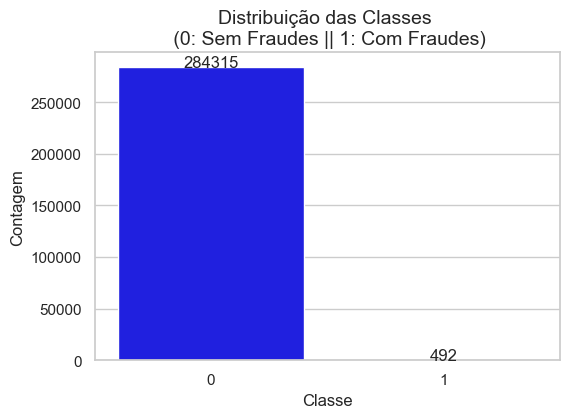

In [1124]:
colors = ["blue", "red"]

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=df, palette=colors)
plt.title('Distribuição das Classes \n (0: Sem Fraudes || 1: Com Fraudes)', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

for p, label in zip(ax.patches, df['Class'].value_counts()):
    ax.annotate(f'{int(label)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

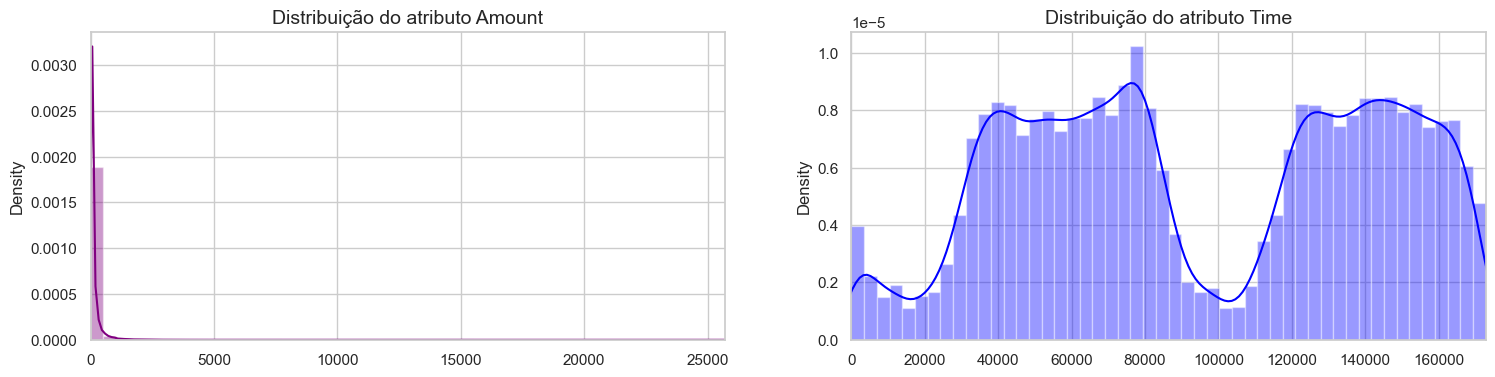

In [1125]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='purple',)
ax[0].set_title('Distribuição do atributo Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribuição do atributo Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## 3. Pré-processamento dos Dados

In [1126]:
# Como a maioria dos dados já foi dimensionada, devemos dimensionar as colunas Amount e Time.
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler é menos suscetível a valores discrepantes (outliers).
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [1127]:
#Normalizando os atributos Time e Amount
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## 4. Modelagem

StratifiedKFold é uma técnica de validação cruzada (cross-validation) amplamente utilizada em problemas de classificação, onde as classes de saída estão desbalanceadas. Ela ajuda a garantir que cada subconjunto (fold) usado para treinamento e teste contenha uma distribuição representativa das classes, evitando viés na avaliação do desempenho do modelo.

Esta técnica ajuda a melhorar a confiabilidade da avaliação do modelo, garantindo que ele seja testado em diferentes combinações de dados de treinamento e teste, mantendo a distribuição das classes. Isso é especialmente importante quando o conjunto de dados é altamente desbalanceado, como é o caso na detecção de fraudes em cartões de crédito, em que a maioria das transações é legítima, e apenas algumas são fraudulentas.

In [1128]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Sem Fraudes', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% do dataset')
print('Com Fraudes', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% do dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Transformando em um array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Sem Fraudes 99.83 % do dataset
Com Fraudes 0.17 % do dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Vale ressaltar que técnias de undersampling e o oversampling são importante ao lidar com conjuntos de dados desbalanceados, como no caso da detecção de fraudes em cartões de crédito. Ambas as técnicas têm vantagens e desvantagens. Aqui está um comparativo entre undersampling e oversampling:

Undersampling:

O que é: O undersampling envolve a redução do número de amostras da classe majoritária (não fraudes) para igualá-lo ao número de amostras da classe minoritária (fraudes).

- Vantagens:
Reduz o tamanho do conjunto de dados, economizando recursos computacionais.
Pode levar a modelos mais rápidos de treinar e testar.
Pode ser eficaz quando a classe majoritária é muito grande em comparação com a classe minoritária.

- Desvantagens:
Pode levar à perda de informações importantes do conjunto de dados original.
Pode aumentar a variabilidade dos resultados, pois diferentes subamostras da classe majoritária podem levar a modelos diferentes.
Não é eficaz quando a classe minoritária é extremamente pequena.

Oversampling:

O que é: O oversampling envolve a geração de novas amostras para a classe minoritária para igualar o número de amostras da classe majoritária.

- Vantagens:
Mantém todas as informações do conjunto de dados original.
Pode melhorar o desempenho do modelo, pois fornece mais exemplos da classe minoritária.
Pode ser eficaz quando a classe minoritária é significativamente menor que a classe majoritária.

- Desvantagens:
Pode aumentar o tempo de treinamento, pois o conjunto de dados se torna maior.
Pode levar a modelos mais suscetíveis a overfitting, se não for usado com cuidado.
A geração de exemplos sintéticos pode introduzir ruído nos dados.

In [1129]:
df = df.sample(frac=1, random_state=42)

# Classe Com Fraudes, quantidade de linhas 492.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Embaralhando as linhas do dataset
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
146884,-0.293579,0.038170,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,...,-0.209856,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0
95597,18.615944,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
96768,1.872424,-0.220456,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,...,-0.294785,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0
75511,2.080905,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1


Distribuição das Classes no Dataset Undersampling


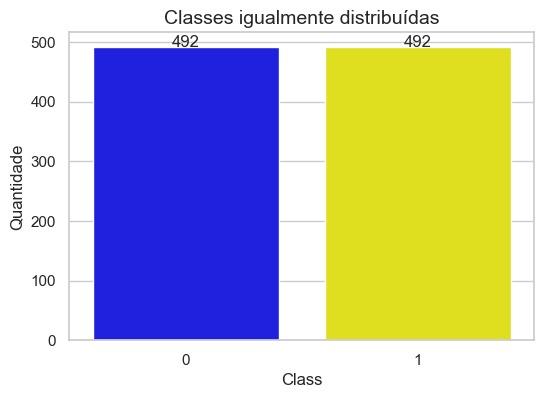

In [1130]:
print('Distribuição das Classes no Dataset Undersampling')
value_counts = new_df['Class'].value_counts(normalize=True)

colors = ['blue', 'yellow']

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Classes igualmente distribuídas', fontsize=14)
plt.ylabel('Quantidade')

for p, label in zip(ax.patches, value_counts):
    ax.annotate(f'{int(label * len(new_df))}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

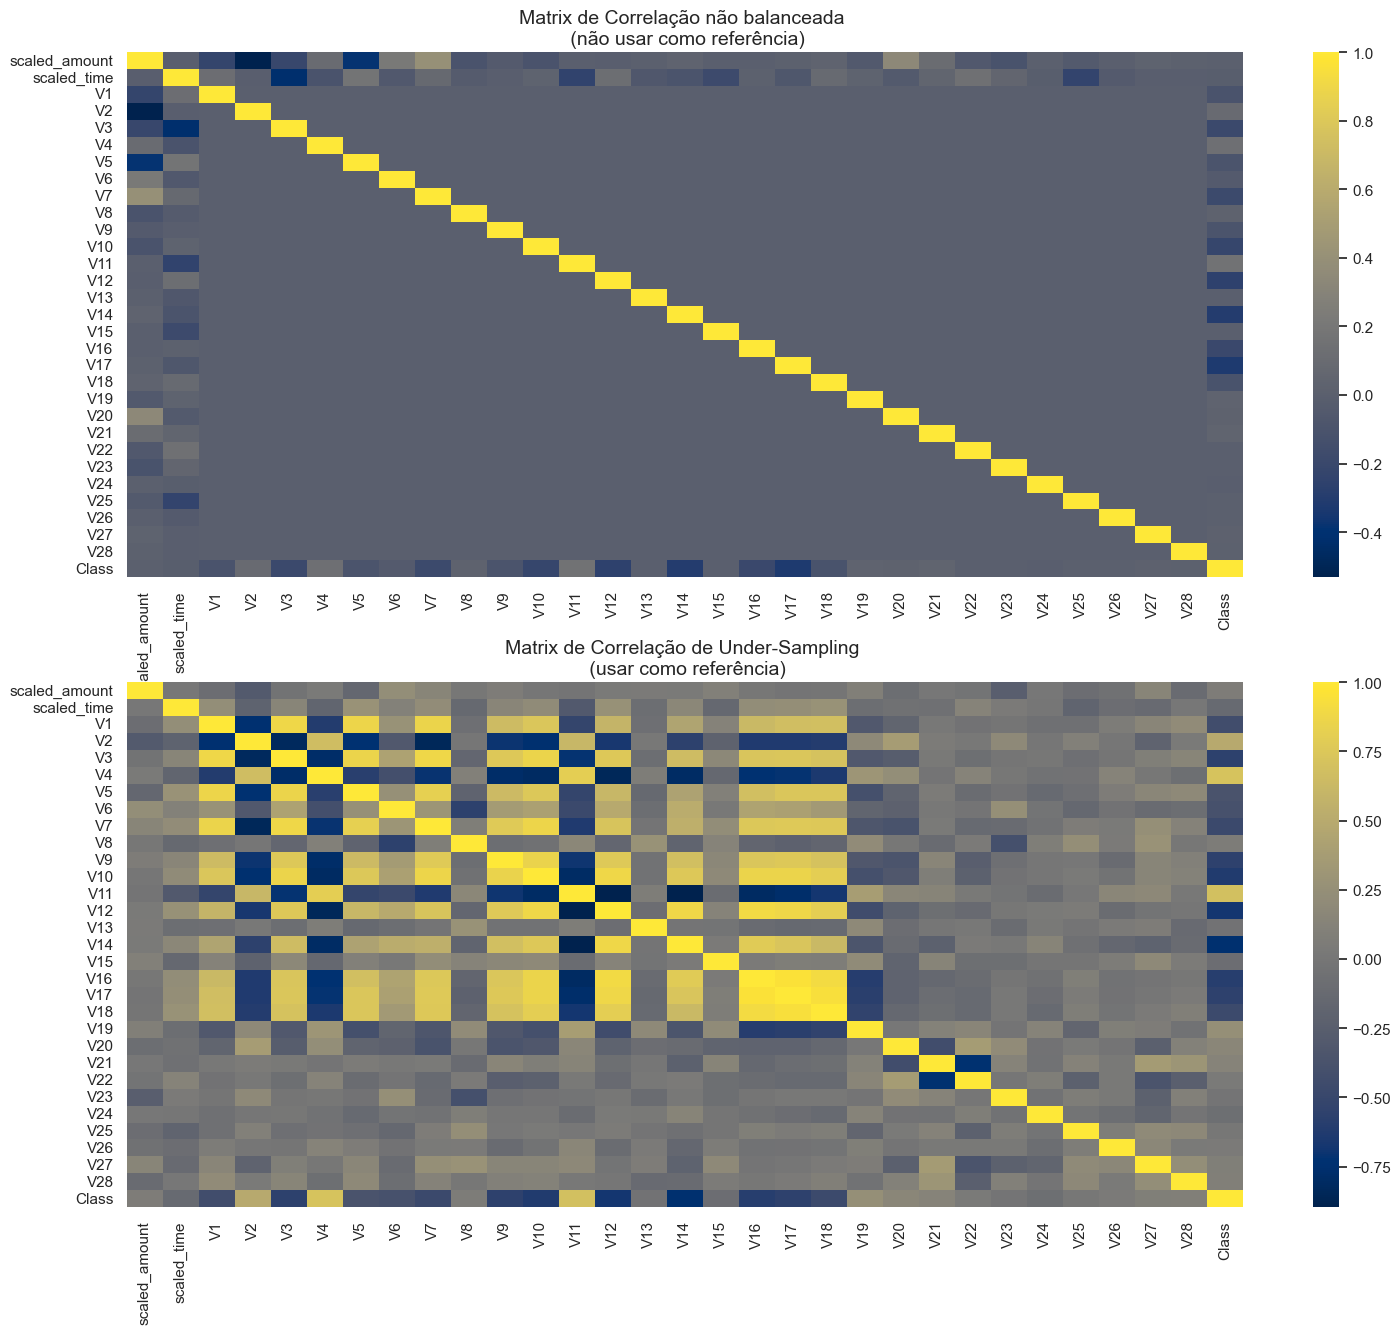

In [1131]:
# Correlações Dataframe completo e Dataset UnderSampling

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,15))

# DataFrame Completo
corr = df.corr()
sns.heatmap(corr, cmap='cividis', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matrix de Correlação não balanceada \n (não usar como referência)", fontsize=14)

# Dataframe UnderSampling (usar este)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='cividis', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matrix de Correlação de Under-Sampling \n (usar como referência)', fontsize=14)
plt.show()

In [1132]:
# Dataset ordenado de Correlações com atributo Class
sub_sample_corr_sorted = sub_sample_corr.sort_values(by='Class', ascending=False)
sub_sample_corr_sorted

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Class,0.065625,-0.132689,-0.430676,0.490349,-0.563496,0.717834,-0.370061,-0.386495,-0.475045,0.058153,...,0.160407,0.130347,0.030112,-0.016247,-0.076578,0.007091,0.044197,0.084914,0.091795,1.000000
V4,0.034435,-0.182883,-0.617715,0.661086,-0.781399,1.000000,-0.586365,-0.410891,-0.704683,0.098686,...,0.230609,-0.016614,0.128274,0.005575,-0.051979,-0.038678,0.130777,0.000718,-0.075723,0.717834
V11,-0.020926,-0.309585,-0.525294,0.610579,-0.716013,0.803189,-0.523171,-0.480722,-0.632793,0.169121,...,0.161321,0.139200,0.028180,-0.029496,-0.109519,0.011389,0.159353,0.179445,0.019563,0.683459
V2,-0.297884,-0.206089,-0.743375,1.000000,-0.829127,0.661086,-0.733437,-0.312957,-0.844686,-0.006570,...,0.373419,0.048057,0.018890,0.185080,-0.003293,0.101507,-0.004719,-0.197594,0.036013,0.490349
V19,0.095998,-0.084622,-0.314701,0.188299,-0.311800,0.305927,-0.401419,-0.178366,-0.337964,0.213989,...,0.010958,0.113888,0.150151,-0.019721,0.132582,-0.177127,0.082755,0.064411,-0.046430,0.247742
V20,-0.087159,-0.056886,-0.181347,0.373419,-0.263898,0.230609,-0.187549,-0.219521,-0.376167,0.002823,...,1.000000,-0.432254,0.369837,0.212067,-0.041044,0.029977,-0.015003,-0.234565,0.105421,0.160407
V21,0.012427,-0.059766,0.017370,0.048057,0.028758,-0.016614,0.045538,0.021060,0.035927,-0.114874,...,-0.432254,1.000000,-0.740197,0.130111,-0.051485,0.125458,0.025665,0.359464,0.297549,0.130347
V28,-0.117868,0.012305,0.209787,0.036013,0.141651,-0.075723,0.191072,-0.082712,0.125312,0.001190,...,0.105421,0.297549,-0.242611,0.101683,-0.019021,0.179700,0.036334,0.236713,1.000000,0.091795
V27,0.142364,-0.124391,0.154626,-0.197594,0.086381,0.000718,0.155479,-0.117140,0.248919,0.275416,...,-0.234565,0.359464,-0.361981,-0.226177,-0.180949,0.199828,0.169391,1.000000,0.236713,0.084914
scaled_amount,1.000000,0.008790,-0.090542,-0.297884,-0.030241,0.034435,-0.160014,0.234015,0.147276,0.001638,...,-0.087159,0.012427,-0.028028,-0.244738,0.009226,-0.094795,-0.054714,0.142364,-0.117868,0.065625


Matrizes de Correlação
As matrizes de correlação são essenciais para compreender nossos dados. Queremos saber se existem características que influenciam significativamente se uma transação específica é uma fraude. No entanto, é importante que usemos o quadro de dados correto (undersampling) para ver quais características têm uma correlação positiva ou negativa alta em relação a transações fraudulentas.

Resumo e Explicação:
Correlações Negativas: V16, V10, V12 estão correlacionados negativamente. Observe como, quanto menores esses valores, maior a probabilidade de o resultado final ser uma transação com fraudes.

Correlações Positivas: V4, V11, V2 estão correlacionados positivamente. Observe como, quanto maiores esses valores, maior a probabilidade de o resultado final ser uma transação com fraudes.

BoxPlots: Usaremos boxplots para ter uma melhor compreensão da distribuição dessas características em transações com fraudes e sem fraudes.

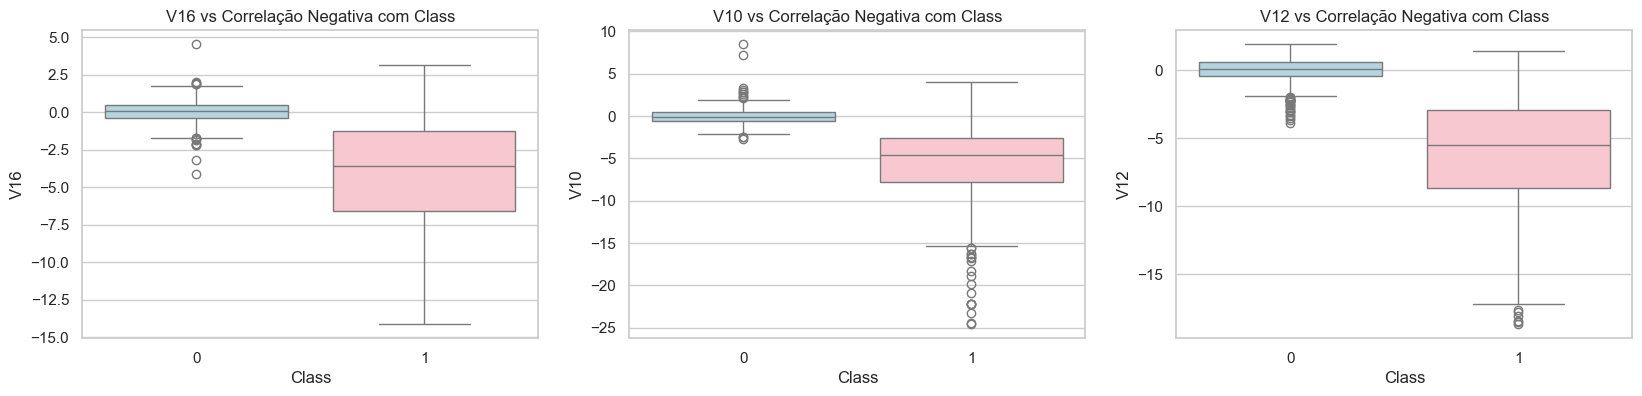

In [1133]:
#Bloxplots dos atributos com maior correlação negativa

colors = ['lightblue', 'pink']

features = ['V16', 'V10', 'V12']

fig, axes = plt.subplots(ncols=len(features), figsize=(20, 4))

for i, feature in enumerate(features):
    sns.boxplot(x="Class", y=feature, data=new_df, palette=colors, ax=axes[i])
    axes[i].set_title('{} vs Correlação Negativa com Class'.format(feature))

plt.show()

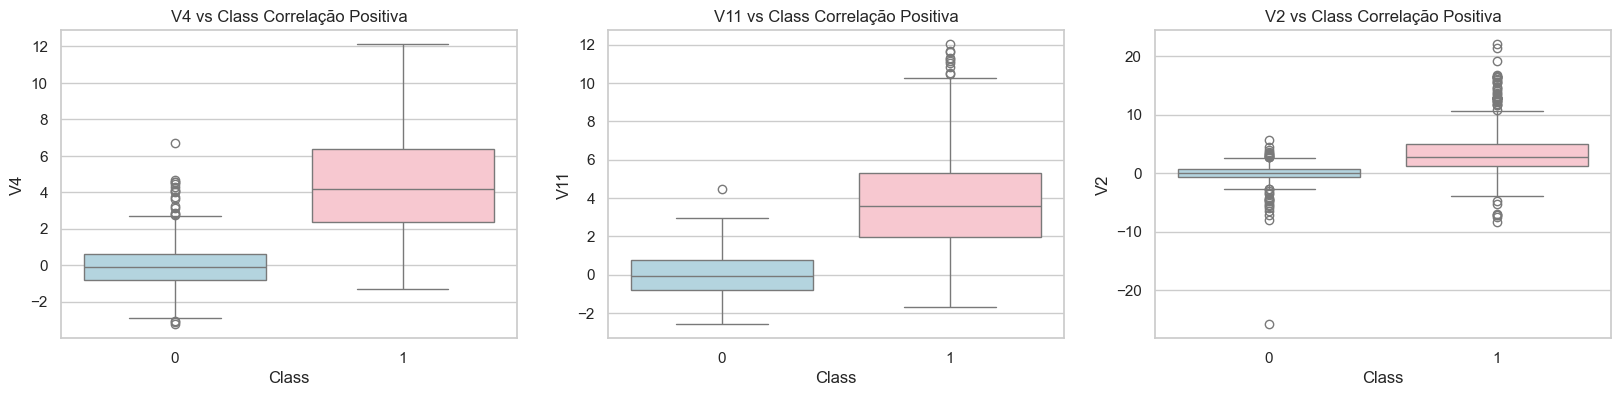

In [1134]:
colors = ['lightblue', 'pink']

features = ['V4', 'V11', 'V2']

fig, axes = plt.subplots(ncols=len(features), figsize=(20, 4))

for i, feature in enumerate(features):
    sns.boxplot(x="Class", y=feature, data=new_df, palette=colors, ax=axes[i])
    axes[i].set_title('{} vs Class Correlação Positiva'.format(feature))

plt.show()

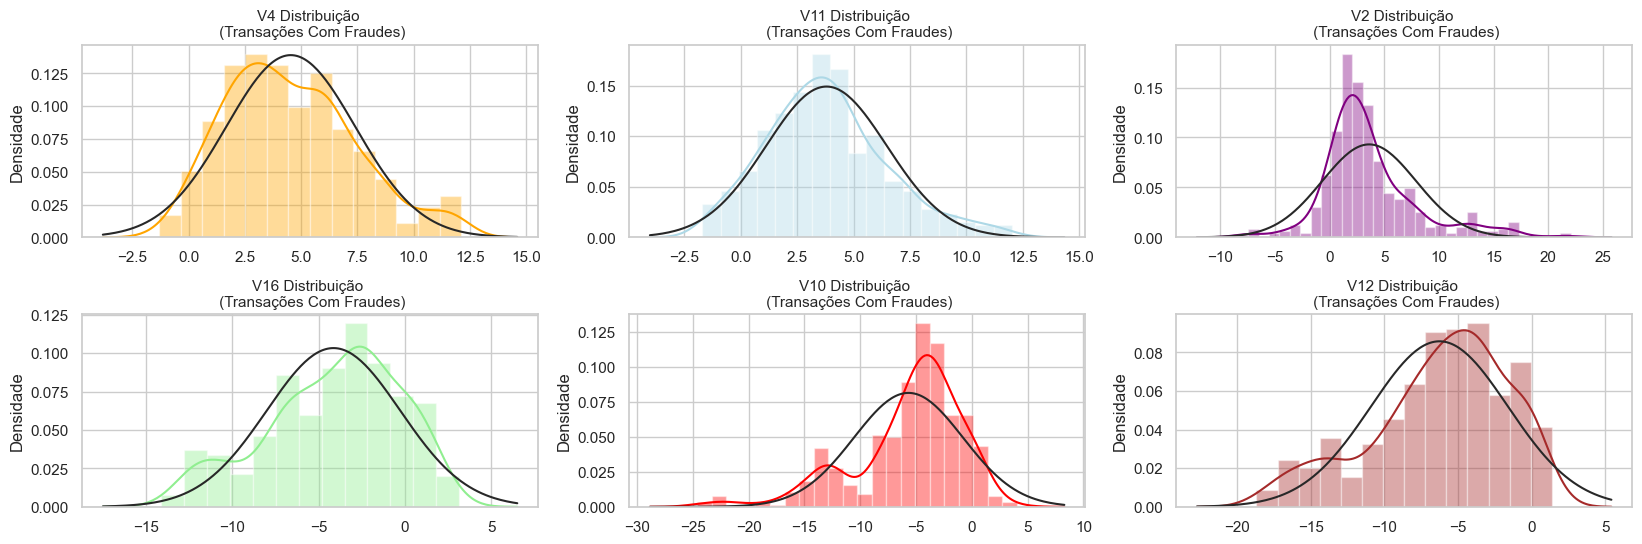

In [1135]:
from scipy.stats import norm

def plot_distribution(dataframe, feature_name, color, ax):
    fraud_dist = dataframe[feature_name].loc[dataframe['Class'] == 1].values
    sns.distplot(fraud_dist, ax=ax, fit=norm, color=color)
    ax.set_title('{} Distribuição \n (Transações Com Fraudes)'.format(feature_name), fontsize=11)
    ax.set_ylabel('Densidade')

f, axes = plt.subplots(2, 3, figsize=(20, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.ravel()

features = ['V4', 'V11', 'V2', 'V16', 'V10', 'V12']
colors = ['orange', 'lightblue', 'purple', 'lightgreen', 'red', 'brown']

for i, feature in enumerate(features):
    plot_distribution(new_df, feature, colors[i], axes[i])

plt.show()

In [1136]:
# Removendo outliers dos atributos com maior correlação negativa e positiva.

def remove_outliers(dataframe, feature_name, multiplier):
    fraud_values = dataframe[feature_name].loc[dataframe['Class'] == 1].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    cut_off = iqr * multiplier
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(feature_name, lower))
    print('{} Upper: {}'.format(feature_name, upper))

    outliers = [x for x in fraud_values if x < lower or x > upper]
    print('Feature {} Outliers for Fraud Cases: {}'.format(feature_name, len(outliers)))
    print('{} outliers:{}'.format(feature_name, outliers))

    dataframe = dataframe.drop(dataframe[(dataframe[feature_name] > upper) | (dataframe[feature_name] < lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(dataframe)))
    print('----' * 44)
    return dataframe

negative_corr_multiplier = 2.1
positive_corr_multiplier = 2.3

# Lista de características com correlação negativa
negative_correlation_features = ['V16','V10','V12']

# Lista de características com correlação positiva
positive_correlation_features = ['V4','V11', 'V2']

for feature_name in negative_correlation_features:
    new_df = remove_outliers(new_df, feature_name, negative_corr_multiplier)

for feature_name in positive_correlation_features:
    new_df = remove_outliers(new_df, feature_name, positive_corr_multiplier)

Quartile 25: -6.562915201970732 | Quartile 75: -1.22604320393038
iqr: 5.336871998040352
Cut Off: 11.20743119588474
V16 Lower: -17.77034639785547
V16 Upper: 9.98138799195436
Feature V16 Outliers for Fraud Cases: 0
V16 outliers:[]
Number of Instances after outliers removal: 984
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -7.7566982278474725 | Quartile 75: -2.6141839131895623
iqr: 5.142514314657911
Cut Off: 10.799280060781612
V10 Lower: -18.555978288629085
V10 Upper: 8.18509614759205
Feature V10 Outliers for Fraud Cases: 10
V10 outliers:[-22.1870885620007, -24.4031849699728, -18.9132433348732, -22.1870885620007, -22.1870885620007, -22.1870885620007, -20.9491915543611, -19.836148851696, -24.5882624372475, -23.2282548357516]
Number of Instances after outliers removal: 973
----------------------------------------------------------------------------

A remoção controlada de valores outliers foi fundamental para que os modelos pudessem generalizar adequadamente.

Como se trat de um dataset extremamente desbalanceado, a remoção indiscriminada causa grande impacto, especialmente na Classe 1 ('Com Fraudes').

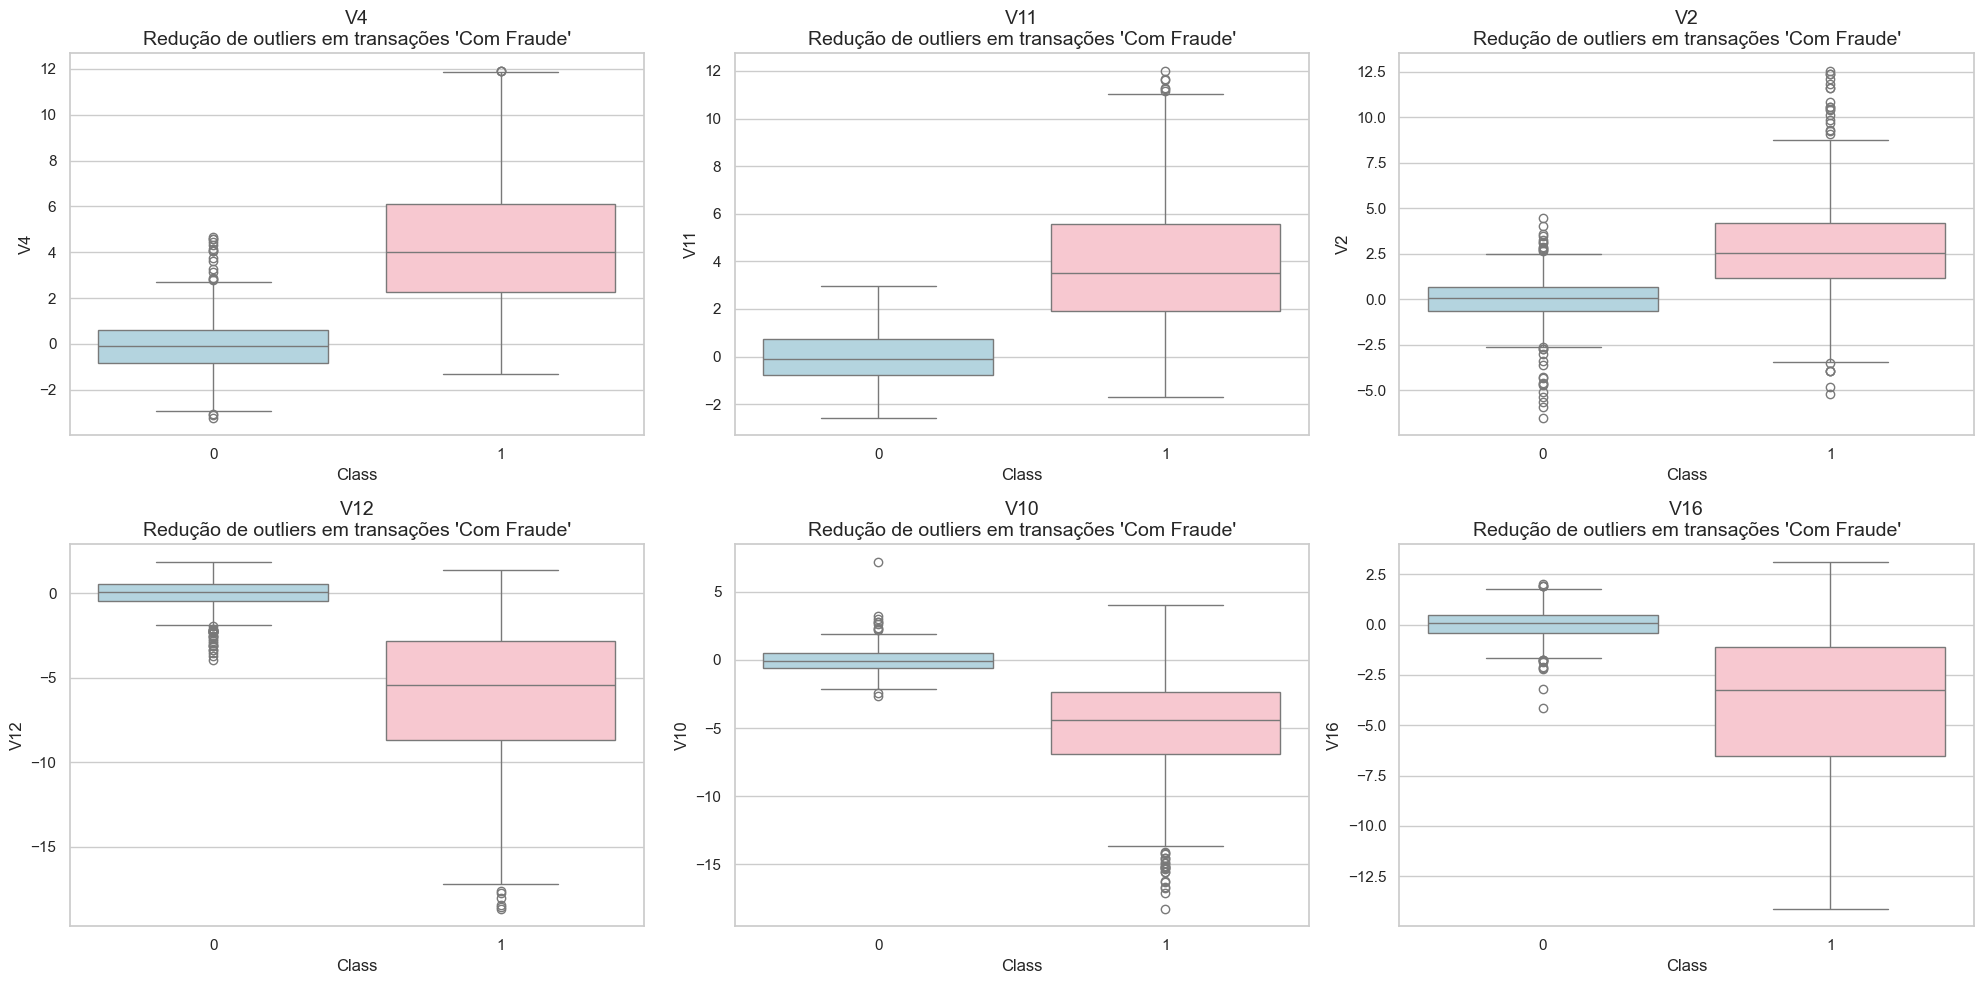

In [1137]:
# Boxplot com remoção de outliers "Com Fraude"
def create_boxplot(data, ax, x, y, title, colors):
    sns.boxplot(x=x, y=y, data=data, ax=ax, palette=colors)
    ax.set_title(title, fontsize=14)

colors = ['lightblue', 'pink']

# Nomes dos atributos
features = ['V4', 'V11', 'V2', 'V12', 'V10', 'V16']

# Títulos dos gráficos
titles = [f"{feature}\nRedução de outliers em transações 'Com Fraude'" for feature in features]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i in range(3):
    create_boxplot(new_df, axes[0, i], "Class", features[i], titles[i], colors)

for i in range(3, 6):
    create_boxplot(new_df, axes[1, i-3], "Class", features[i], titles[i], colors)

plt.tight_layout()
plt.show()

## Redução de Dimensionalidade e Clusterização

In [1138]:
# New_df é randomico da subamostra de dados (com valores redução de outliers)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE valor {:.2} s".format(t1 - t0))

# PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA valor {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD valor {:.2} s".format(t1 - t0))

T-SNE valor 2.8 s
PCA valor 0.01 s
Truncated SVD valor 0.007 s


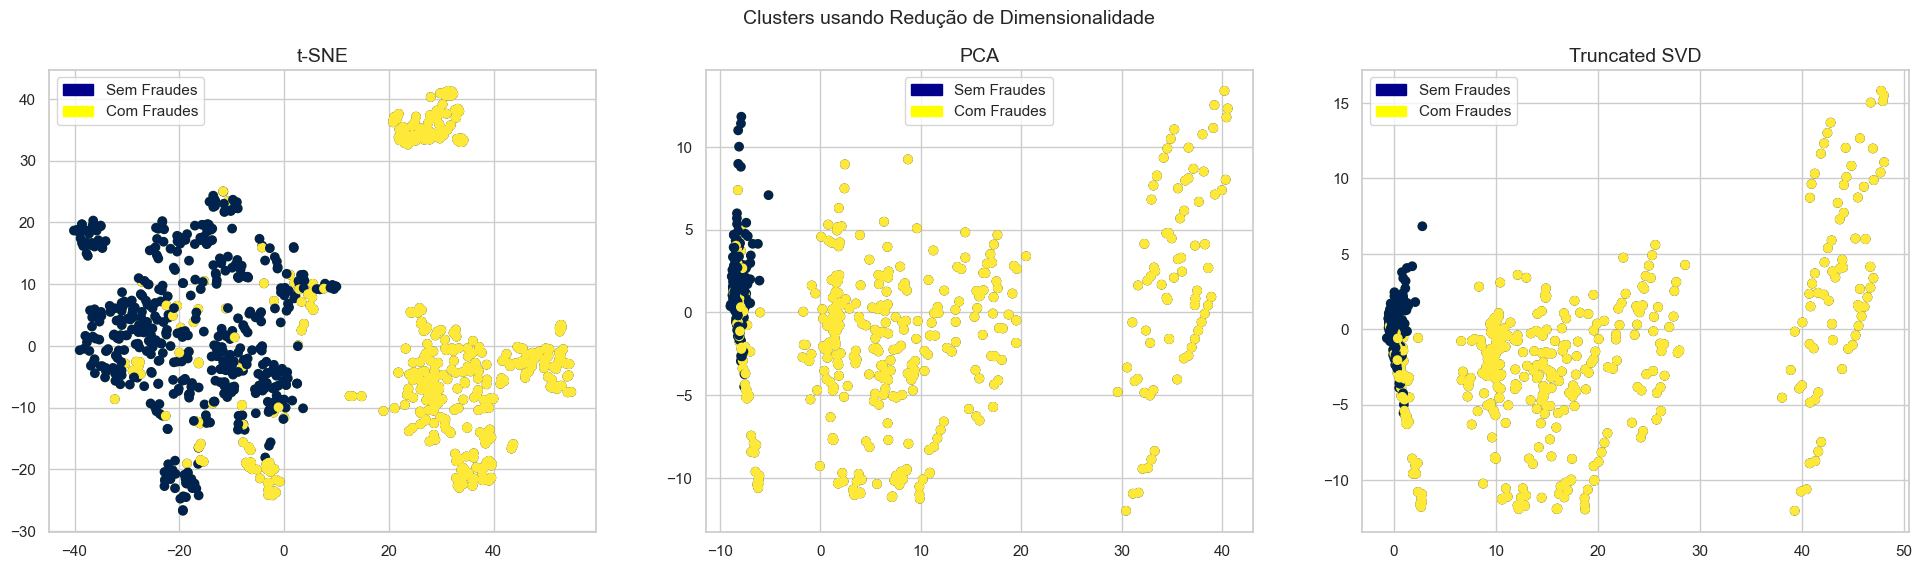

In [1139]:
# Função para criar scatter plot
def create_scatter_plot(ax, X_reduced, y, method_name):
    blue_patch = mpatches.Patch(color='darkblue', label='Sem Fraudes')
    red_patch = mpatches.Patch(color='yellow', label='Com Fraudes')

    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=(y == 0), cmap='cividis', label='Sem Fraudes', linewidths=1)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=(y == 1), cmap='cividis', label='Fraudes', linewidths=1)
    ax.set_title(method_name, fontsize=14)
    ax.grid(True)
    ax.legend(handles=[blue_patch, red_patch])

# Preparar subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters usando Redução de Dimensionalidade', fontsize=14)

# T-SNE scatter plot
create_scatter_plot(ax1, X_reduced_tsne, y, 't-SNE')

# PCA scatter plot
create_scatter_plot(ax2, X_reduced_pca, y, 'PCA')

# TruncatedSVD scatter plot
create_scatter_plot(ax3, X_reduced_svd, y, 'Truncated SVD')

plt.show()

O algoritmo t-SNE consegue agrupar com bastante precisão os casos de fraude e não fraude em nosso conjunto de dados.
Apesar de a subamostra ser relativamente pequena, o algoritmo t-SNE é capaz de detectar clusters com bastante precisão em todos os cenários (amostra randômica).
Pode ser um indicador de que modelos preditivos adicionais provavelmente terão um bom desempenho na separação de casos de fraudes e não fraudes.

## Classificadores

In [1140]:
# Undersampling antes da validação cruzada
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [1141]:
# Dados já estão normalizados, aqui dividindo em treino e teste
from sklearn.model_selection import train_test_split

# Usando para undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1142]:
try:
    # Transformando dados em um array para usar em algoritmos de classificação.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
except AttributeError as e:
    print(f"Erro: {e}. Os objetos X_train, X_test, y_train e y_test já são arrays NumPy ou não são do tipo pandas DataFrame.")


In [1143]:
# Implementando classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [1144]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classificadores: ", classifier.__class__.__name__, "Score em treino", round(training_score.mean(), 2) * 100, "% accuracy")

Classificadores:  LogisticRegression Score em treino 93.0 % accuracy
Classificadores:  KNeighborsClassifier Score em treino 93.0 % accuracy
Classificadores:  SVC Score em treino 93.0 % accuracy
Classificadores:  DecisionTreeClassifier Score em treino 90.0 % accuracy


In [1145]:
# Usando GridSearchCV para encontrar melhores parâmetros
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_

#  KNeighbors Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

In [1146]:
# Utilizando undersampling durante a validação cruzada
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Implementando Técnica NearMiss
# Distribuição da NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Validação Cruzada
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE durante validação cruzada
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56961  56962  56963 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 57389]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56961  56962  56963 ... 115149 115895 115915]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113917 113918 113919 ... 174064 175233 176377]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170875 170876 170877 ... 231615 231641 232419]
Train: [     0      1      2 ... 231615 231641 232419] Test: [227839 227840 227841 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


- O NearMiss com validação cruzada (Cross-Validation) é uma abordagem que combina a técnica de undersampling do NearMiss com a validação cruzada para lidar com problemas de classificação em conjuntos de dados desbalanceados. A validação cruzada é uma técnica importante para avaliar o desempenho de modelos de aprendizado de máquina e, ao combiná-la com o NearMiss, pode garantir que a subamostragem seja realizada de maneira mais robusta e representativa.

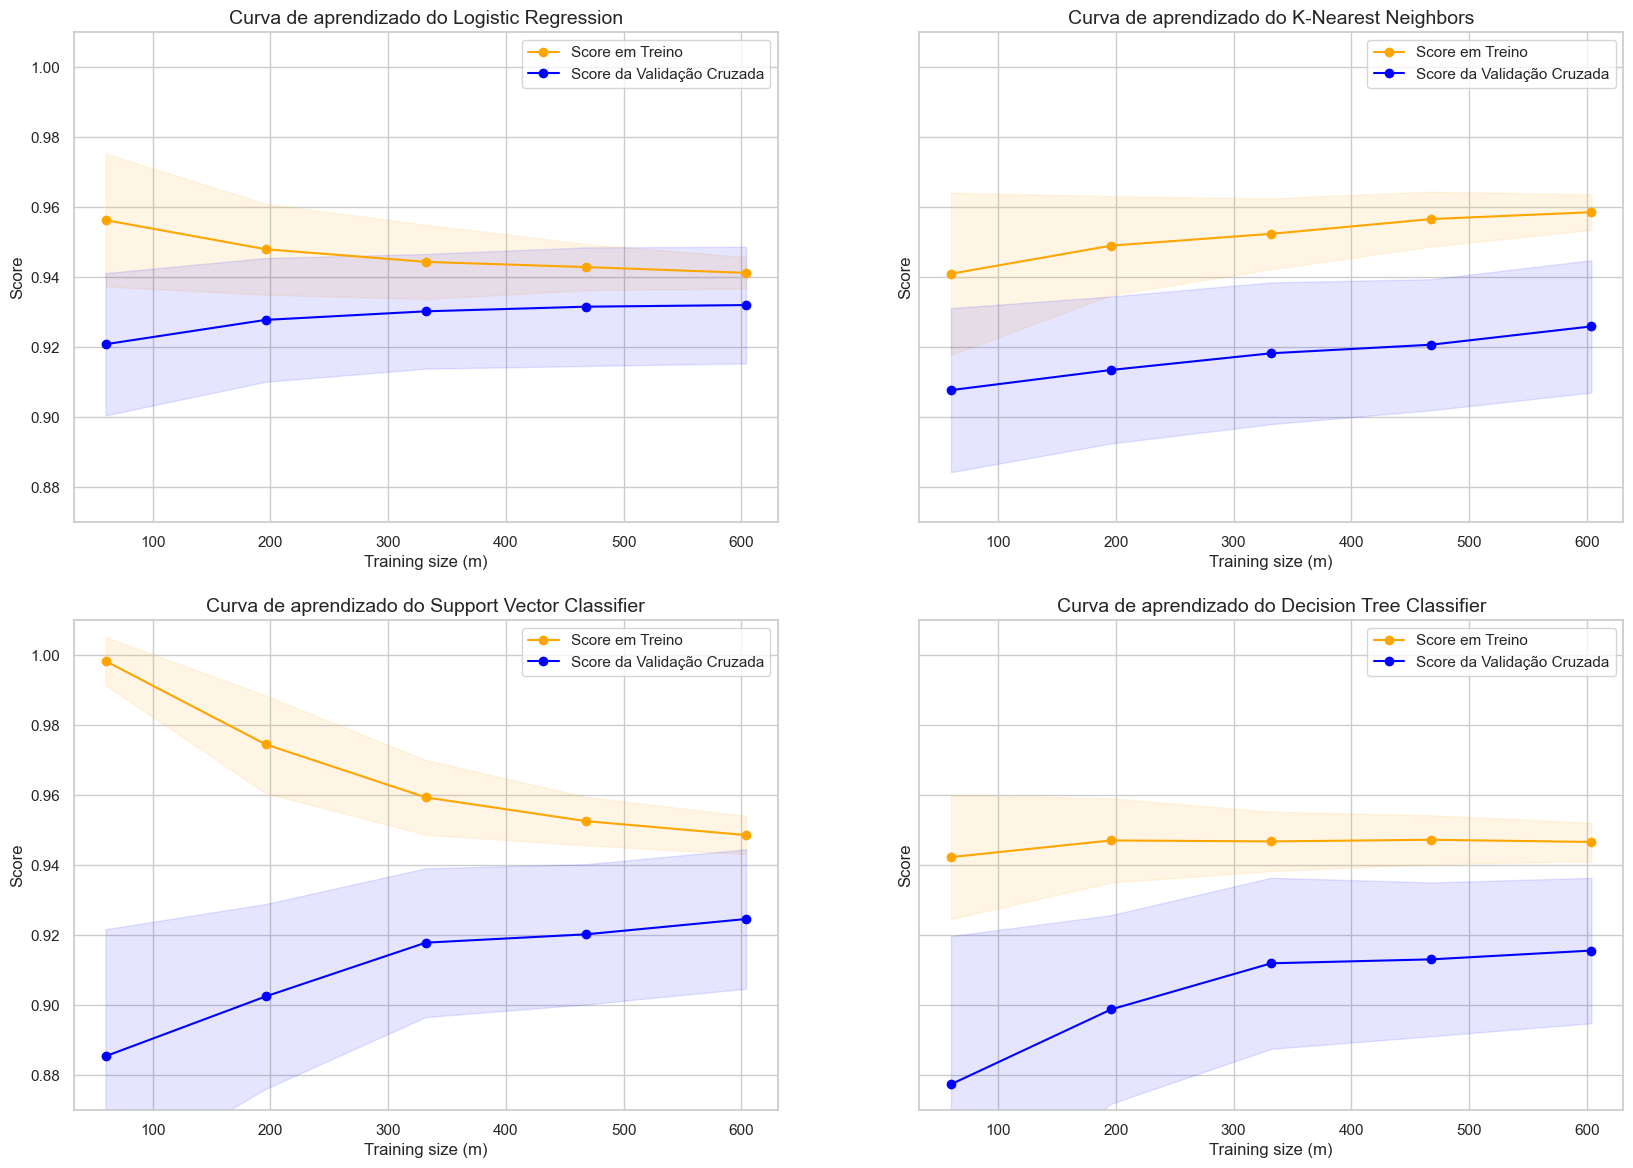

In [1147]:
# Gráfico da Curva de aprendizado em treino e validação cruzada dos Classificadores
from sklearn.model_selection import ShuffleSplit, learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimators, estimator_names, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, axes = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    for i, estimator in enumerate(estimators):
        ax = axes[i // 2, i % 2]
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="orange")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="blue")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="orange", label="Score em Treino")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="blue", label="Score da Validação Cruzada")
        ax.set_title(f"Curva de aprendizado do {estimator_names[i]}", fontsize=14)
        ax.set_xlabel('Training size (m)')
        ax.set_ylabel('Score')
        ax.grid(True)
        ax.legend(loc="best")

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimators = [log_reg, knears_neighbors, svc, tree_clf]  # Substitua pelos seus estimadores
estimator_names = ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Classifier", "Decision Tree Classifier"]
plot_learning_curve(estimators, estimator_names, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()


In [1148]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Cria DataFrame com todos os scores e nomes dos Classificadores.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

- A curva ROC é uma representação gráfica da taxa de verdadeiros positivos em relação à taxa de falsos positivos à medida que o limiar de decisão do modelo de classificação varia. A área sob a curva ROC (ROC AUC) é um valor numérico que varia de 0 a 1 e fornece uma medida do desempenho geral do modelo. Quanto maior o valor do ROC AUC, melhor o modelo é em separar classes positivas e negativas.

In [1149]:
from sklearn.metrics import roc_auc_score

estimators = [log_reg, knears_neighbors, svc, tree_clf]
estimator_names = ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Classifier", "Decision Tree Classifier"]

for estimator, estimator_name in zip(estimators, estimator_names):
    y_pred = estimator.predict(X_train)
    auc_score = roc_auc_score(y_train, y_pred)
    print(f'{estimator_name}: {auc_score}')

Logistic Regression: 0.8735237813718452
K-Nearest Neighbors: 0.9588488661796377
Support Vector Classifier: 0.9473558267528115
Decision Tree Classifier: 0.9392410230423828


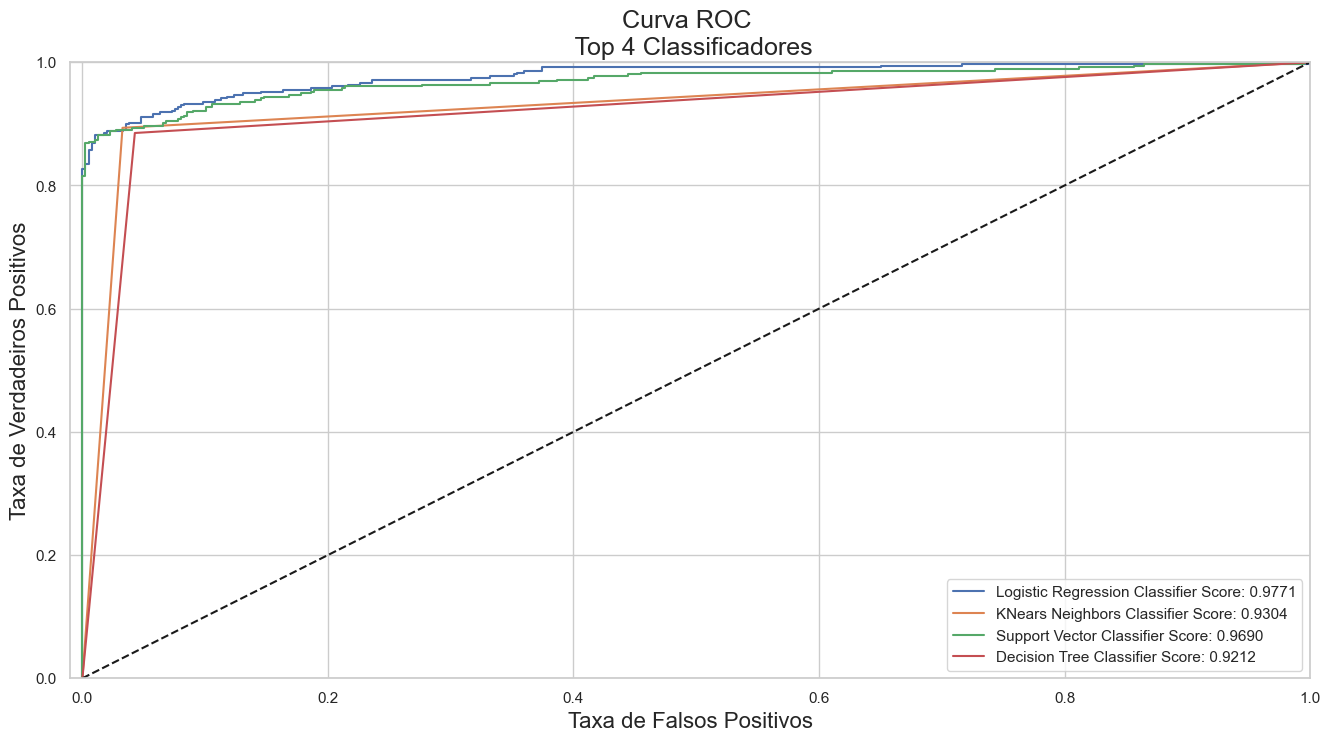

In [1150]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Curva ROC \n Top 4 Classificadores', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Regressão Logística foi o Modelo que apresentou melhor performance


Métricas importantes do classificador de regressão logística.

Termos:

- Verdadeiro Positivo: Transações Fraudulentas Classificadas Corretamente
- Falso Positivo: Transações Fraudulentas Classificadas Incorretamente
- Verdadeiro Negativo: Transações Não Fraudulentas Classificadas Corretamente
- Falso Negativo: Transações Não Fraudulentas Classificadas Incorretamente
- Acurácia (Accuracy) = (Número de previsões corretas) / (Número total de previsões)
- Precisão (Precision): Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)
- Revocação (Recall): Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
- F1-Score = 2 * (Precisão * Revocação) / (Precisão + Revocação)

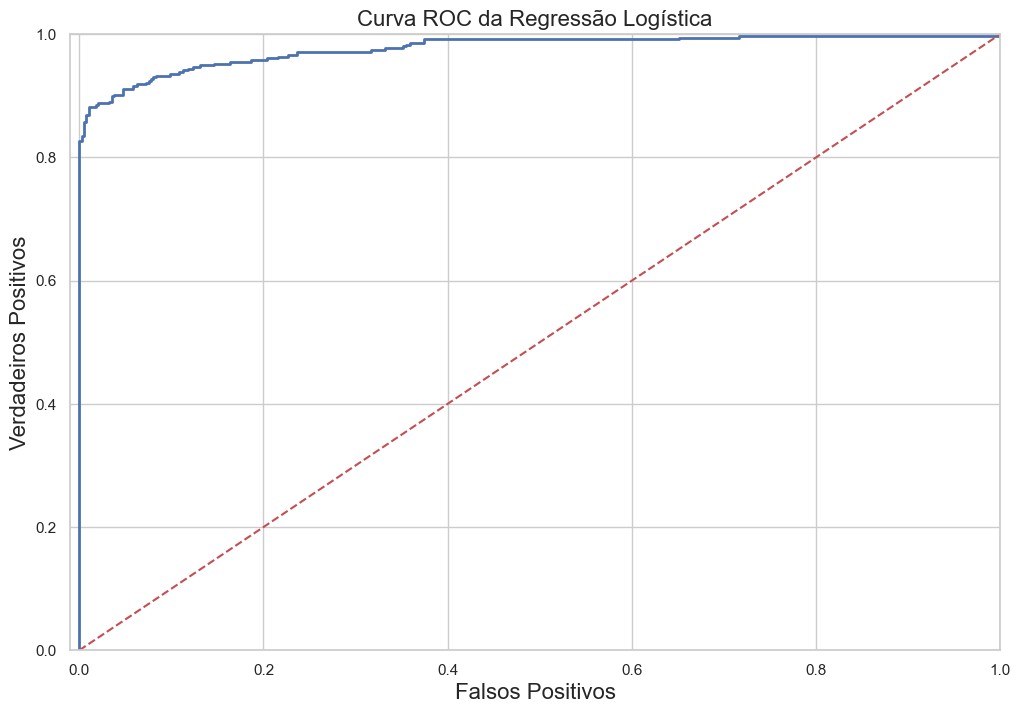

In [1151]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Curva ROC da Regressão Logística', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Falsos Positivos', fontsize=16)
    plt.ylabel('Verdadeiros Positivos', fontsize=16)
    plt.axis([-0.01,1,0,1])

logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [1152]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [1153]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [1154]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.07


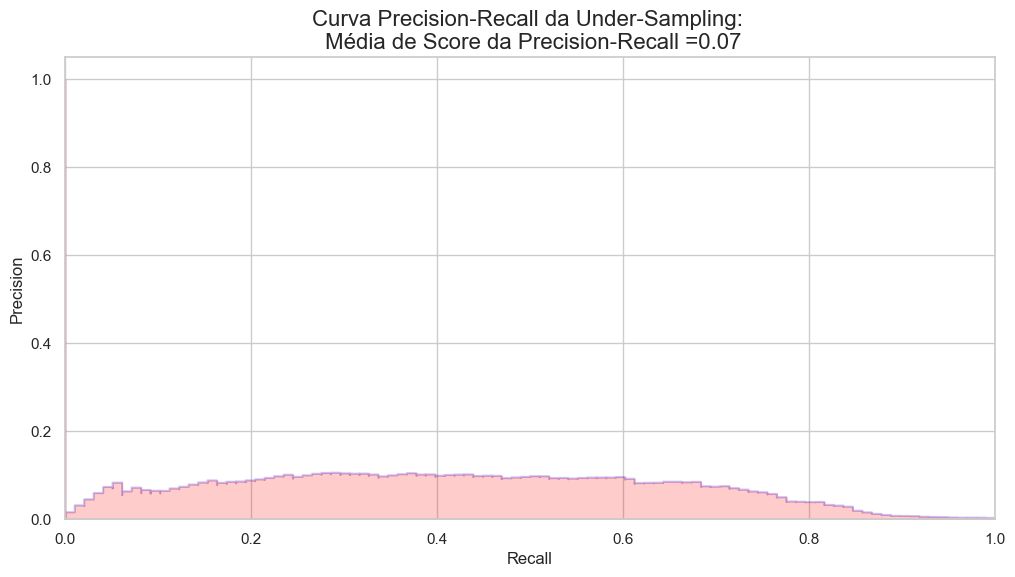

In [1155]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='blue', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='red')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall da Under-Sampling: \n Média de Score da Precision-Recall ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)
plt.show()

In [1156]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementando SMOTE e Cross Validating
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9424179144651316
precision: 0.06195441733013215
recall: 0.9162934112301201
f1: 0.11431236364728936
---------------------------------------------------------------------------------------------------------------------------------------


In [1157]:
labels = ['Sem Fraudes', 'Com Fraudes']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

 Sem Fraudes       1.00      0.99      0.99     56863
 Com Fraudes       0.10      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [1158]:
y_score = best_est.decision_function(original_Xtest)

In [1159]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


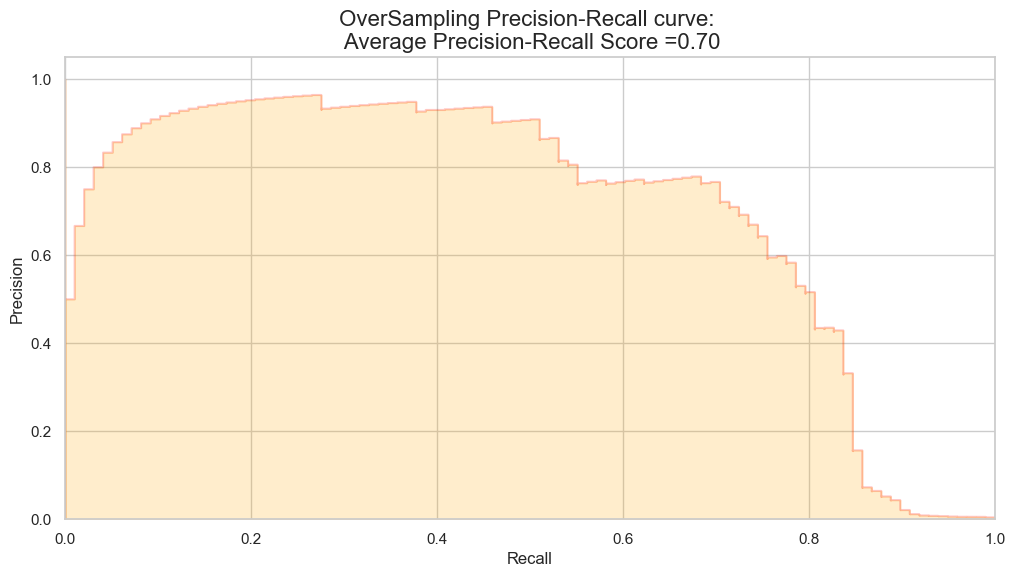

In [1160]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='red', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='orange')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)
plt.show()

In [1161]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

# Implementando OverSampling (SMOTE) - Synthetic Minority Over-sampling Technique
sm = SMOTE(random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

# Implementando NearMiss Technique (UnderSampling)
nr = NearMiss()
Xnr_train, ynr_train = nr.fit_resample(original_Xtrain, original_ytrain)

# Checando distribuição dos Rótulos
print("SMOTE Label Distribution: {}".format(Counter(ysm_train)))
print("NearMiss Label Distribution: {}".format(Counter(ynr_train)))

SMOTE Label Distribution: Counter({0: 227452, 1: 227452})
NearMiss Label Distribution: Counter({0: 394, 1: 394})


In [1162]:
# Melhorando desempenho dos modelos usando GridSearchCV.
# Não foi implementado no modelo KNearsNeighbors e SVC por economia de recursos computacionais

t0 = time.time()

log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)

t1 = time.time()
print("Tempo de implementação do GridSearchCV  :{} sec".format(t1 - t0))

Tempo de implementação do GridSearchCV  :2.8979270458221436 sec


In [1163]:
t0 = time.time()

tree_clf_sm = grid_tree.best_estimator_
tree_clf_sm.fit(Xsm_train, ysm_train)

t1 = time.time()
print("Tempo de implementação do GridSearchCV  :{} sec".format(t1 - t0))


Tempo de implementação do GridSearchCV  :14.969980001449585 sec


## Testando os Modelos com os dados teste:


- Random UnderSampling: Vamos avaliar o desempenho final dos modelos de classificação no subconjunto de amostragem randômica.
- Os modelos que apresentaram os melhores resultados foram a Regressão Logistica e SVC (Suport Vector Classifier)

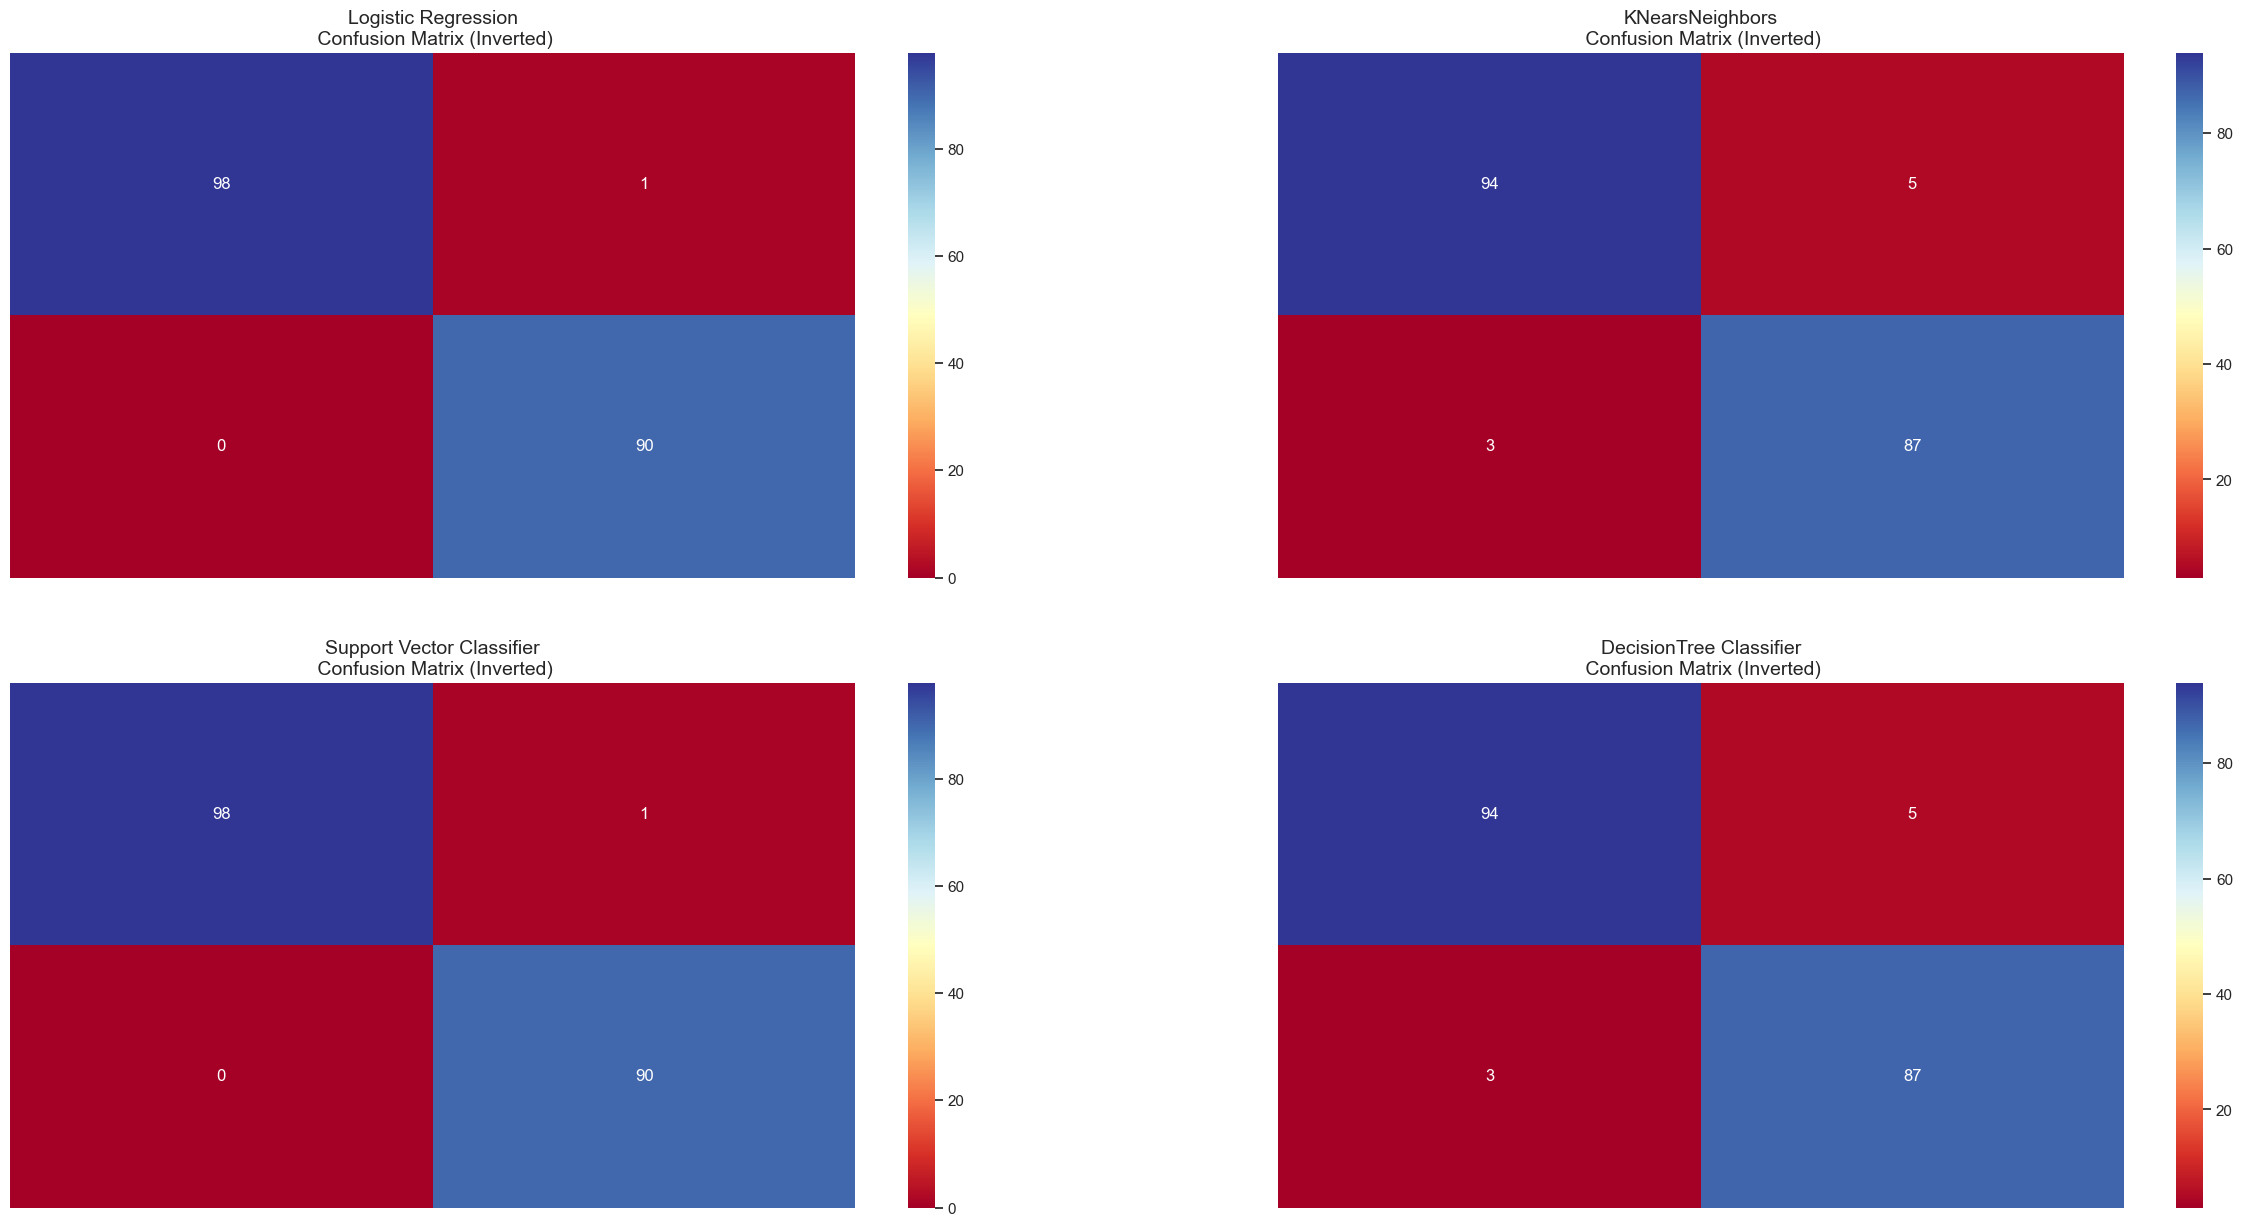

In [1164]:
# Modelos Usando Undersampling
from sklearn.metrics import confusion_matrix

# Lista de modelos e previsões
models = [log_reg, knears_neighbors, svc, tree_clf]
y_preds = [model.predict(X_test) for model in models]

# Lista de rótulos e matrizes de confusão
labels = ["Logistic Regression", "KNearsNeighbors", "Support Vector Classifier", "DecisionTree Classifier"]
confusion_matrices = [confusion_matrix(y_test, y_pred) for y_pred in y_preds]

# Configuração da figura
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

for i, ax in enumerate(axes.ravel()):
    # Invertendo os quadrantes
    tn, fp, fn, tp = confusion_matrices[i].ravel()
    inverted_confusion_matrix = np.array([[tp, fn], [fp, tn]])

    sns.heatmap(inverted_confusion_matrix, ax=ax, annot=True, cmap=plt.cm.RdYlBu)
    ax.set_title(labels[i] + "\n Confusion Matrix (Inverted)", fontsize=14)
    ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

# Optamos por inverter os quadrantes, para representar melhor os resultados
- Quadrante Superior Esquerdo: "True Positive" - Operações 'Sem Fraudes' que modelo identificou corretamente.
- Quadrante Superior Direito: "False Positive" - Operações 'Com Fraudes' que o modelo identificou como 'Sem Fraudes'.
- Quadrante Inferior Esquerdo: "False Negative" - Operações 'Sem Fraudes' que o modelo identificou como 'Com Fraudes'.
- Quadrannte Inferior Direito: "True Negative" - Operções 'Com Fraudes' que o modelo identificou corretamente.

In [1165]:
from sklearn.metrics import classification_report

classifiers = [log_reg, knears_neighbors, svc, tree_clf]
classifier_names = ["Logistic Regression", "KNearsNeighbors", "Support Vector Classifier", "DecisionTree Classifier"]

for classifier, classifier_name in zip(classifiers, classifier_names):
    y_pred = classifier.predict(X_test)
    print(classifier_name + ":")
    print(classification_report(y_test, y_pred))
    print()


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.99      0.99        99

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189


KNearsNeighbors:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        90
           1       0.97      0.95      0.96        99

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted avg       0.96      0.96      0.96       189


Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.99      0.99        99

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighte

In [1166]:
# Final Score no set de teste da logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression com Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression com SMOTE Technique
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.994709
1,Oversampling (SMOTE),0.986043


# Considerações Finais

Neste projeto de detecção de fraude em cartões de crédito, foram implementadas estratégias essenciais para lidar com dados extremamente desbalanceados e avaliar o desempenho do modelo. O balanceamento de classes foi abordado por meio de técnicas de oversampling (SMOTE) e undersampling (Random UnderSampling), permitindo que o modelo aprenda de forma mais equitativa. Além disso, a validação cruzada (ShuffleSplit) foi utilizada para avaliar o desempenho dos modelos de maneira robusta. Também foi realizada a remoção de outliers na classe com fraude, focando nas instâncias mais representativas.

A análise dos resultados demonstrou que diferentes algoritmos, como Logistic Regression, Support Vector Classifier, KNears Neighbors e DecisionTree Classifier, apresentaram desempenho notável na detecção de fraudes. As métricas de avaliação, como precisão, recall e F1-score, foram calculadas para cada modelo, fornecendo uma visão abrangente do seu desempenho.

Na análise dos resultados, observamos que as técnicas de undersampling, que consistem na redução das amostras para balanceamento, superaram as técnicas de oversampling. Os modelos treinados com undersampling mostraram desempenhos notavelmente superiores, destacando-se pela sua eficácia em identificar operações 'Com Fraudes' e 'Sem Fraudes', o que é essencial em problemas de detecção de fraudes.

Esses resultados evidenciam a importância de considerar a qualidade das técnicas de balanceamento, bem como seus impactos na performance do modelo. O uso de técnicas de undersampling não apenas melhorou a precisão das previsões, mas também ofereceu vantagens significativas em termos de economia de poder computacional e velocidade no treinamento dos dados. Essa eficiência na utilização dos recursos computacionais criou uma vantagem competitiva considerável, tornando as técnicas de undersampling uma escolha sólida para a detecção de fraudes em cenários reais.

Portanto, ao considerar as nuances das técnicas de balanceamento de dados, podemos concluir que, embora as abordagens de oversampling sejam relevantes em certos contextos, as técnicas de undersampling demonstraram seu valor ao otimizar o desempenho do modelo e economizar recursos valiosos.

Em resumo, a combinação de técnicas de processamento de dados, balanceamento de classes e validação cruzada resultou em modelos eficazes na detecção de transações fraudulentas em cartões de crédito, oferecendo um meio confiável de proteger contra atividades fraudulentas.

Detectar as operações sem fraude e com fraude em transações de cartão de crédito é de extrema importância, pois impacta diretamente a experiência do cliente. 

A identificação correta, evita prejuízos financeiros e transtornos para o cliente. Salienta-se ainda que transações legítimas não sejam equivocadamente bloqueadas, evitando o constrangimento e a frustração do cliente ao ter uma transação negada erroneamente.

Encontrar o equilíbrio entre esses indicadores é essencial para manter a segurança e a conveniência, promovendo a confiança do cliente nas operações com cartões de crédito.


## Referências

- Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2021
- Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn by Coding-Maniac
- auprc, 5-fold c-v, and resampling methods by Jeremy Lane (Kaggle Notebook)
- Credit Fraud || Dealing with Imbalanced Datasets by JANIO MARTINEZ BACHMANN (Kaggle Notebook)